In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_name = "1632560262896716.csv"
pdf = pd.read_csv(file_name)
pdf["Gender"] = pdf["Gender"].map({"Male":2, "Female":1})
pdf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


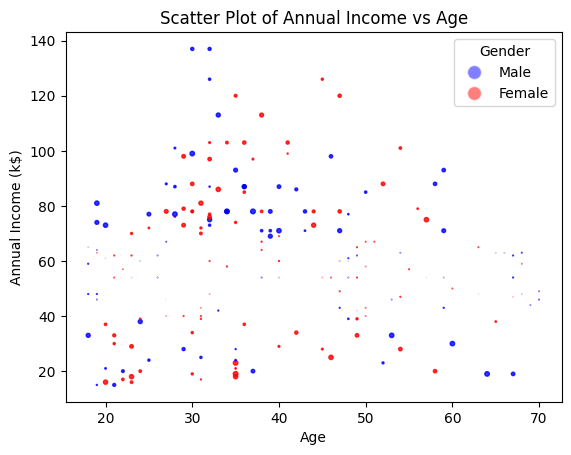

In [3]:
clus_dataset = pdf[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
colors = {2:"blue", 1:"red"}
area = np.pi * (StandardScaler().fit_transform(clus_dataset["Spending Score (1-100)"].values.reshape(-1, 1))**2)
plt.scatter(clus_dataset["Age"], clus_dataset["Annual Income (k$)"], c=clus_dataset["Gender"].map(colors),alpha=0.8, s=area)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[key], markersize=10, alpha=0.5) for key in colors]
labels = ['Male', 'Female']
plt.legend(handles, labels, title="Gender", loc='upper right')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of Annual Income vs Age')
plt.show()

Missing data in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


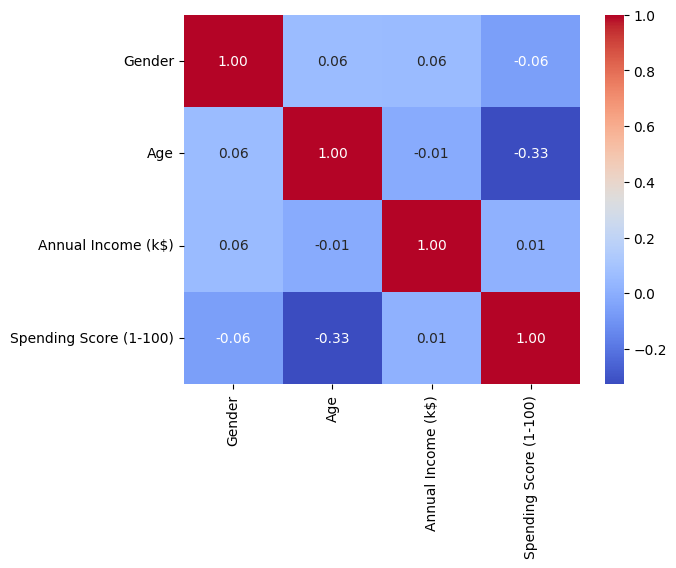

In [4]:
# Check for missing values in the dataset
missing_data = pdf.isnull().sum()
print(f"Missing data in each column:\n{missing_data}")

clus_dataset = StandardScaler().fit_transform(clus_dataset)
print(clus_dataset[0:5])

clus_dataframe = pd.DataFrame(clus_dataset, columns=["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])
corr_matrix = clus_dataframe.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt="0.2f")
plt.show()

In [5]:
clus_dataset = StandardScaler().fit_transform(clus_dataset)

clus_1 = StandardScaler().fit_transform(pdf[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]])
clus_2 = StandardScaler().fit_transform(pdf[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
clus_3 = StandardScaler().fit_transform(pdf[["Gender", "Age", "Spending Score (1-100)"]])
clus_4 = StandardScaler().fit_transform(pdf[["Gender", "Age", "Annual Income (k$)"]])
clus_5 = StandardScaler().fit_transform(pdf[["Annual Income (k$)", "Spending Score (1-100)"]])
clus_6 = StandardScaler().fit_transform(pdf[["Age", "Annual Income (k$)"]])
clus_7 = StandardScaler().fit_transform(pdf[["Age", "Spending Score (1-100)"]])
clus_8 = StandardScaler().fit_transform(pdf[["Gender", "Annual Income (k$)"]])
clus_9 = StandardScaler().fit_transform(pdf[["Gender", "Age"]])

clus_list = [clus_1, clus_2, clus_3, clus_4, clus_5, clus_6, clus_7, clus_8, clus_9]

# DBSCAN

In [6]:
info_list = []
eps_l = np.linspace(0.1, 2, 40)
clus_n = 0
for clus in clus_list:
    clus_n += 1
    print(clus_n)
    for ep in eps_l:
        for min_sm in range(2, 10):
            epsilon = ep
            minimum_samples = min_sm
            db = DBSCAN(eps = epsilon, min_samples=minimum_samples).fit(clus)
            labels = db.labels_
            
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(clus, labels)
                # print(f"Silhouette Score: {silhouette_avg}")
                info_list.append([silhouette_avg, clus_n, ep, min_sm])
            else:
                pass

1
2
3
4
5
6
7
8
9


In [7]:
info_list = np.array(info_list)
for c in range(1, len(clus_list)+1):
    filtered_info_list = info_list[info_list[:, 1] == c]
    max_index = np.argmax(filtered_info_list[:, 0])
    print(f"dataset: {int(filtered_info_list[max_index, 1])}, score: {round(filtered_info_list[max_index, 0], 3)}, eps: {round(filtered_info_list[max_index, 2], 3)}, min_samples: {int(filtered_info_list[max_index, 3])}")

dataset: 1, score: 0.278, eps: 1.123, min_samples: 2
dataset: 2, score: 0.323, eps: 1.123, min_samples: 7
dataset: 3, score: 0.364, eps: 0.928, min_samples: 2
dataset: 4, score: 0.363, eps: 0.733, min_samples: 2
dataset: 5, score: 0.471, eps: 0.344, min_samples: 3
dataset: 6, score: 0.393, eps: 0.733, min_samples: 9
dataset: 7, score: 0.349, eps: 0.392, min_samples: 9
dataset: 8, score: 0.539, eps: 0.538, min_samples: 2
dataset: 9, score: 0.538, eps: 0.246, min_samples: 2


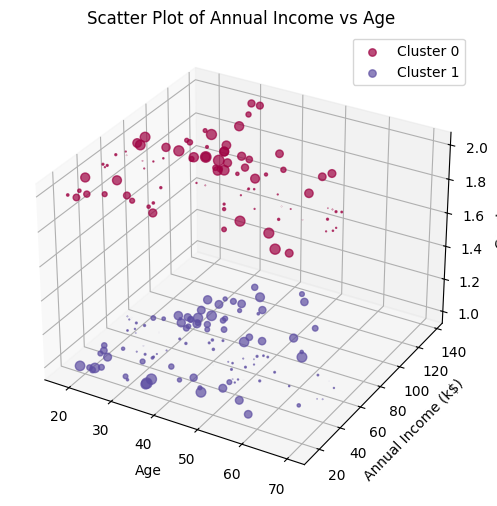

In [8]:
epsilon = 0.538
minimum_samples = 2
db = DBSCAN(eps = epsilon, min_samples=minimum_samples).fit(clus_8)
labels = db.labels_



area = np.pi * (StandardScaler().fit_transform(pdf["Spending Score (1-100)"].values.reshape(-1, 1))**2)
pdf['DB_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Age"][class_member_mask], pdf["Annual Income (k$)"][class_member_mask], pdf["Gender"][class_member_mask],s=5*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Gender')

ax.set_title('Scatter Plot of Annual Income vs Age')
plt.show()

In [9]:
db_customer = pdf.groupby(['DB_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   DB_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0         0    male  39.806818           62.227273               48.511364
1         1  female  38.098214           59.250000               51.526786


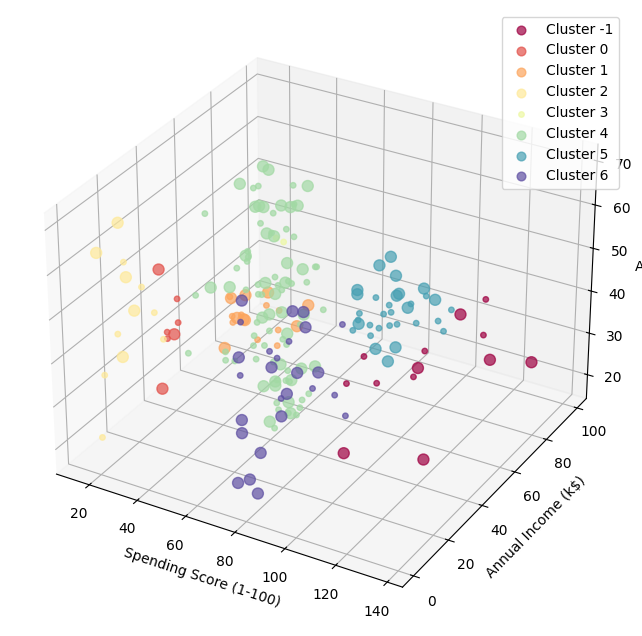

In [10]:
epsilon = 0.344
minimum_samples = 3
db = DBSCAN(eps = epsilon, min_samples=minimum_samples).fit(clus_5)
labels = db.labels_

pdf['DB_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

area = np.pi * (pdf["Gender"].values.reshape(-1, 1))**2
# Plot each cluster

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Annual Income (k$)"][class_member_mask], pdf["Spending Score (1-100)"][class_member_mask], pdf["Age"][class_member_mask],s=5*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Age')

# ax.title('Scatter Plot of Annual Income vs Age')
plt.show()

In [11]:
db_customer = pdf.groupby(['DB_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})
print(db_customer)

    DB_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0         -1  female  39.285714          111.142857               50.571429
1         -1    male  30.833333          118.833333               58.000000
2          0  female  37.750000           23.750000               34.500000
3          0    male  35.333333           20.666667               34.333333
4          1  female  23.777778           26.111111               76.777778
5          1    male  25.000000           25.777778               77.666667
6          2  female  43.428571           24.857143               11.000000
7          2    male  56.200000           24.200000                7.600000
8          3  female  31.000000           20.000000               97.000000
9          4  female  41.037037           54.796296               47.592593
10         4    male  45.514286           55.371429               49.457143
11         5  female  31.722222           81.722222               82.000000
12         5

# KNN

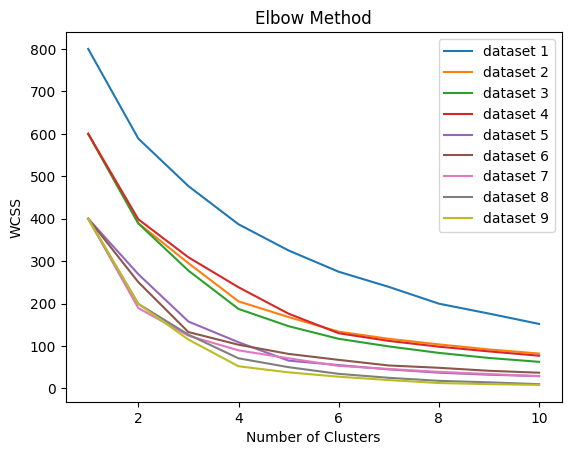

In [12]:
if "DB_label"  in pdf.columns:
    pdf = pdf.drop('DB_label', axis=1)
else:
    pass

clus_n = 0
for clus in clus_list:
    clus_n += 1
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(clus)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss, label=f"dataset {clus_n}")
plt.legend()
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
k_vs_cluster = [6, 4, 6, 5, 3, 2, 4, 4]
clus_n = 1
for clus, k in zip(clus_list[1:], k_vs_cluster):
    clus_n += 1
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(clus)
    labels = kmeans.labels_
        
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(clus, labels)
        print(f"dataset:{clus_n} ,Score: {silhouette_avg}, K:{k}")
    else:
        pass

dataset:2 ,Score: 0.4274281499158017, K:6
dataset:3 ,Score: 0.4426083116149251, K:4
dataset:4 ,Score: 0.42794400304837266, K:6
dataset:5 ,Score: 0.5546571631111091, K:5
dataset:6 ,Score: 0.4431419612216489, K:3
dataset:7 ,Score: 0.47212716430695223, K:2
dataset:8 ,Score: 0.5552810971848448, K:4
dataset:9 ,Score: 0.625921258683381, K:4


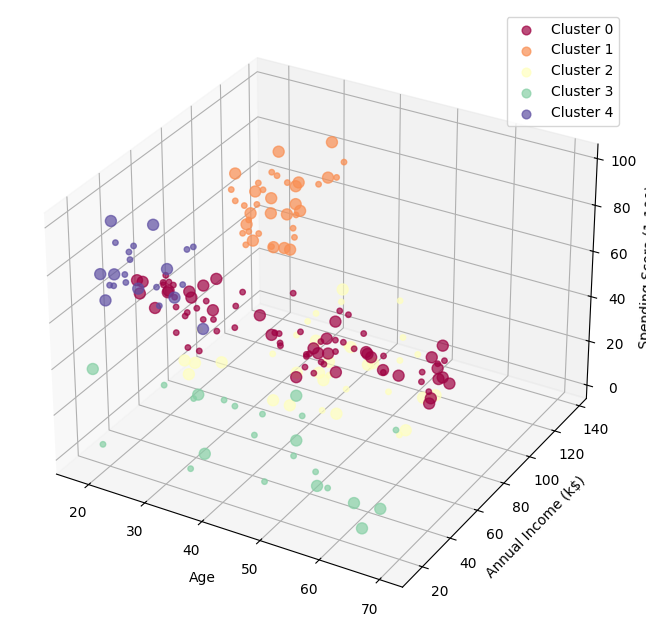

In [14]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(clus_5)
labels = kmeans.labels_

pdf['KMeans_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

area = np.pi * (pdf["Gender"].values.reshape(-1, 1))**2
# Plot each cluster

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Age"][class_member_mask], pdf["Annual Income (k$)"][class_member_mask], pdf["Spending Score (1-100)"][class_member_mask], s=5*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [15]:
db_customer = pdf.groupby(['KMeans_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   KMeans_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0             0  female  40.895833           55.354167               49.000000
1             0    male  45.363636           55.212121               50.272727
2             1  female  32.190476           86.047619               81.666667
3             1    male  33.277778           87.111111               82.666667
4             2  female  43.250000           90.937500               22.062500
5             2    male  39.315789           85.894737               12.947368
6             3  female  43.214286           27.357143               21.714286
7             3    male  48.333333           24.666667               19.666667
8             4  female  25.461538           25.692308               80.538462
9             4    male  25.000000           25.777778               77.666667


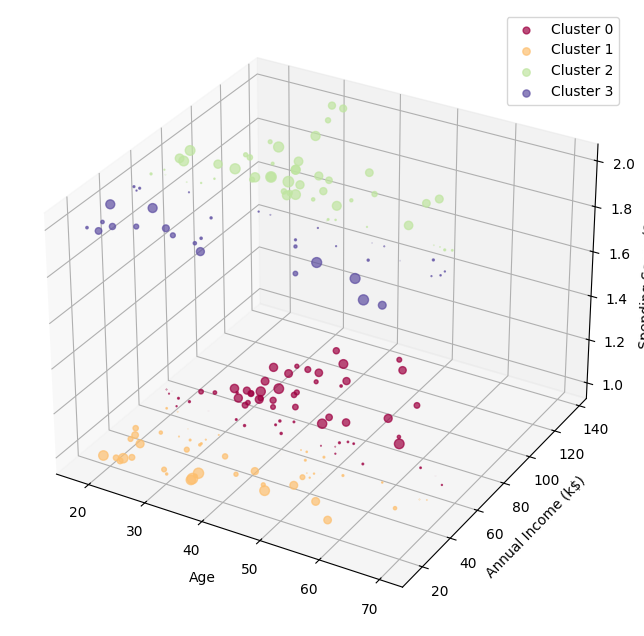

In [16]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(clus_8)
labels = kmeans.labels_

pdf['KMeans_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

area = np.pi * (StandardScaler().fit_transform(pdf["Spending Score (1-100)"].values.reshape(-1, 1))**2)
# Plot each cluster

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Age"][class_member_mask], pdf["Annual Income (k$)"][class_member_mask], pdf["Gender"][class_member_mask],s=5*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [17]:
db_customer = pdf.groupby(['KMeans_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   KMeans_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0             0  female  37.741935           78.145161               52.741935
1             1  female  38.540000           35.820000               50.020000
2             2    male  38.230769           79.634615               47.365385
3             3    male  42.083333           37.083333               50.166667


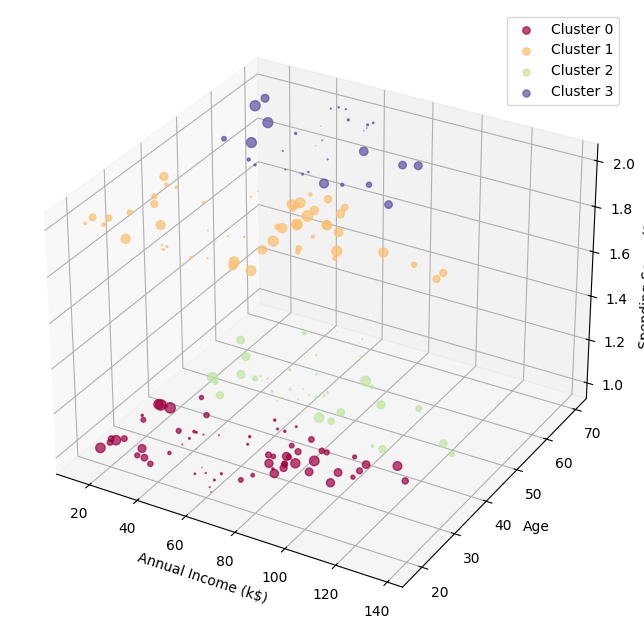

In [18]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(clus_9)
labels = kmeans.labels_

pdf['KMeans_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

area = np.pi * (StandardScaler().fit_transform(pdf["Spending Score (1-100)"].values.reshape(-1, 1))**2)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Annual Income (k$)"][class_member_mask], pdf["Age"][class_member_mask], pdf["Gender"][class_member_mask],s=5*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_ylabel('Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [19]:
db_customer = pdf.groupby(['KMeans_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   KMeans_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0             0  female  29.623188           59.101449               60.695652
1             1    male  29.732143           66.035714               55.678571
2             2  female  51.697674           59.488372               36.813953
3             3    male  57.437500           55.562500               35.968750


# Hierarchical clustering

In [20]:
if "KMeans_label" in pdf.columns:
    pdf = pdf.drop('KMeans_label', axis=1)
else:
    pass

info_list = []
clus_n = 0
for clus in clus_list:
    clus_n += 1
    print(clus_n)
    for n in range(2, 6):
        agglom = AgglomerativeClustering(n_clusters = n, linkage = 'average').fit(clus)
        labels = agglom.labels_
        
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(clus, labels)
            # print(f"Silhouette Score: {silhouette_avg}")
            info_list.append([silhouette_avg, clus_n, n])
        else:
            pass

1
2
3
4
5
6
7
8
9


In [21]:
info_list = np.array(info_list)
for c in range(1, len(clus_list)+1):
    filtered_info_list = info_list[info_list[:, 1] == c]
    max_index = np.argmax(filtered_info_list[:, 0])
    print(f"dataset: {int(filtered_info_list[max_index, 1])}, score: {round(filtered_info_list[max_index, 0], 3)}, Number of Cluster: {round(filtered_info_list[max_index, 2], 3)}")

dataset: 1, score: 0.307, Number of Cluster: 5.0
dataset: 2, score: 0.41, Number of Cluster: 5.0
dataset: 3, score: 0.407, Number of Cluster: 5.0
dataset: 4, score: 0.33, Number of Cluster: 3.0
dataset: 5, score: 0.496, Number of Cluster: 4.0
dataset: 6, score: 0.361, Number of Cluster: 2.0
dataset: 7, score: 0.419, Number of Cluster: 3.0
dataset: 8, score: 0.516, Number of Cluster: 3.0
dataset: 9, score: 0.626, Number of Cluster: 4.0


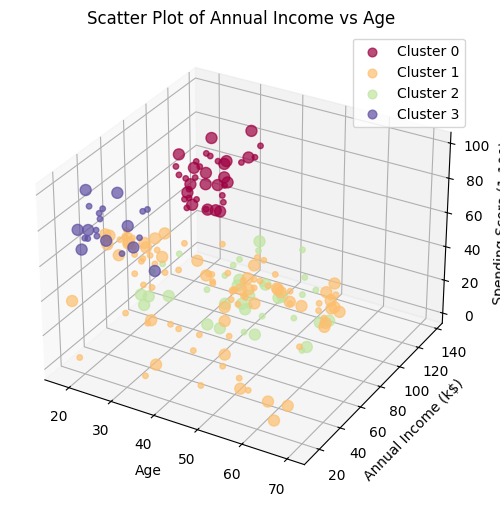

In [22]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(clus_5)
labels = agglom.labels_

# area = np.pi * (StandardScaler().fit_transform(pdf["Spending Score (1-100)"].values.reshape(-1, 1))**2)
area = np.pi * (pdf["Gender"].values.reshape(-1, 1)**2)

pdf['Agglom_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Age"][class_member_mask], pdf["Annual Income (k$)"][class_member_mask], pdf["Spending Score (1-100)"][class_member_mask],s=5*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.set_title('Scatter Plot of Annual Income vs Age')
plt.show()

In [23]:
db_customer = pdf.groupby(['Agglom_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   Agglom_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0             0  female  32.190476           86.047619               81.666667
1             0    male  33.277778           87.111111               82.666667
2             1  female  41.622951           48.049180               43.393443
3             1    male  46.073171           48.121951               43.926829
4             2  female  41.388889           89.055556               23.722222
5             2    male  39.500000           85.150000               14.050000
6             3  female  25.583333           24.583333               81.833333
7             3    male  25.000000           25.777778               77.666667


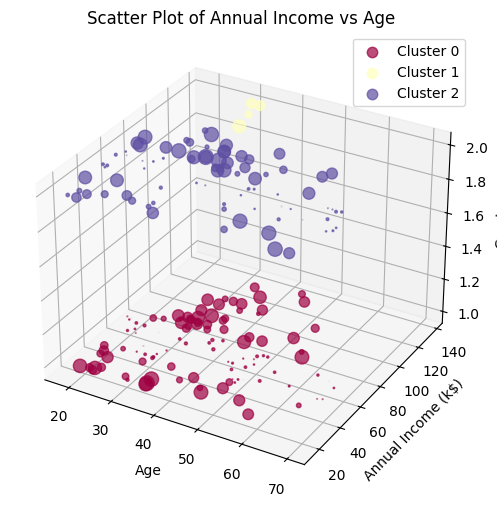

In [24]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(clus_8)
labels = agglom.labels_

area = np.pi * (StandardScaler().fit_transform(pdf["Spending Score (1-100)"].values.reshape(-1, 1))**2)
# area = np.pi * (pdf["Gender"].values.reshape(-1, 1)**2)

pdf['Agglom_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Age"][class_member_mask], pdf["Annual Income (k$)"][class_member_mask], pdf["Gender"][class_member_mask],s=10*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Gender')

ax.set_title('Scatter Plot of Annual Income vs Age')
plt.show()

In [25]:
db_customer = pdf.groupby(['Agglom_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   Agglom_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0             0  female  38.098214           59.250000               51.526786
1             1    male  31.750000          128.250000               45.750000
2             2    male  40.190476           59.083333               48.642857


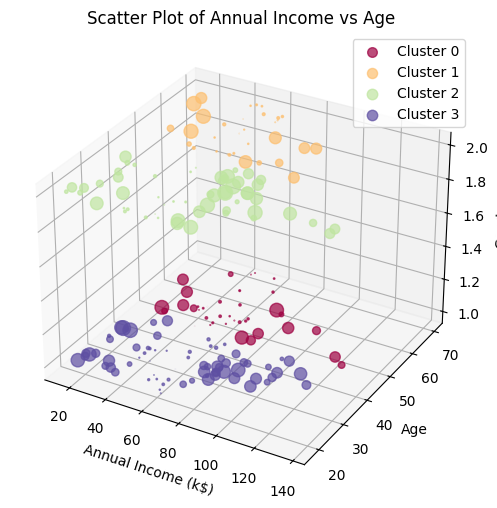

In [26]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(clus_9)
labels = agglom.labels_

area = np.pi * (StandardScaler().fit_transform(pdf["Spending Score (1-100)"].values.reshape(-1, 1))**2)
# area = np.pi * (pdf["Gender"].values.reshape(-1, 1)**2)

pdf['Agglom_label'] = labels
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    sc = ax.scatter(pdf["Annual Income (k$)"][class_member_mask], pdf["Age"][class_member_mask], pdf["Gender"][class_member_mask],s=10*area[class_member_mask], 
                label=f'Cluster {k}', 
                alpha = 0.7,
                color=col)


plt.legend()

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Gender')

ax.set_title('Scatter Plot of Annual Income vs Age')
plt.show()

In [27]:
db_customer = pdf.groupby(['Agglom_label', 'Gender'])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
db_customer = db_customer.reset_index()
db_customer['Gender'] = db_customer['Gender'].map({2: "male", 1: "female"})

print(db_customer)

   Agglom_label  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0             0  female  52.475000           58.050000               37.750000
1             1    male  57.437500           55.562500               35.968750
2             2    male  29.732143           66.035714               55.678571
3             3  female  30.111111           59.916667               59.180556
